## Recommendation Systems
In this question you will apply these methods to a real dataset. The data contains information about TV shows. More precisely, for 9985 users and 563 popular TV shows, we know if a given user watched a given show over a 3 month period.

The data sets are:

- `user-shows.txt`: This is the ratings matrix $R$, where each row corresponds to a user and each column corresponds to a TV show. $R_ij$ = 1 if user $i$ watched the show $j$ over a period of three months. The columns are separated by a space.
- `shows.txt`: This is a file containing the titles of the TV shows, in the same order as the columns of $R$.


We will compare the user-user and item-item collaborative filtering recommendations for the 500th user of the dataset. Let’s call him Alex. In order to do so, we have erased the first 100 entries of Alex’s row in the matrix, and replaced them by 0s. This means that we don’t know which of the first 100 shows Alex has watched or not. Based on Alex’s behaviour on the other shows, we will give Alex recommendations on the first 100 shows. We will then see if our recommendations match what Alex had in fact watched.

- Compute the matrices $P$ and $Q$.
- Compute $\Gamma$ for the user-user collaborative filtering. Let $S$ denote the set of the first 100 shows (the first 100 columns of the matrix). From all the TV shows in $S$, which are the five that have the highest similarity scores for Alex? What are their similarity score? In case of ties between two shows, choose the one with smaller index. Do not write the index of the TV shows, write their names using the file `shows.txt`.
- Compute the matrix $\Gamma$ for the movie-movie collaborative filtering. From all the TV shows in $S$, which are the five that have the highest similarity scores for Alex? In case of ties between two shows, choose the one with smaller index. Again, hand in the names of the shows and their similarity score.

Alex’s original row is given in the file `alex.txt`. For a given number $k$, the precision at top-$k$ is defined as follows: using the matrix $\Gamma$ computed previously, compute the top-$k$ TV shows in $S$ that are most similar to Alex (break ties as before). The precision is the fraction of the top-$k$ TV shows that were watched by Alex in reality.

- Plot the precision at top-$k$ (defined above) as a function of $k$, for $k$ $\in$ [1, 19], with predictions obtained by the user-user collaborative filtering.
• On the same figure, plot the precision at top-$k$ as a function of $k$, for $k$ $\in$ [1, 19], with predictions obtained by the item-item collaborative filtering.

In [8]:
%matplotlib inline
import numpy as np
from scipy import spatial
import pickle

Load the ratings matrix R

In [2]:
def loadRatings():
    ratings = []
    with open('user-shows.txt', 'r') as f:
        for line in f:
            line = map(int, line.strip().split())
            ratings.append(line)
    return ratings

Compute the matrices P

In [3]:
def calcP(R):
    m, _ = R.shape
    P = np.zeros([m, m])
    for i in range(m):
        P[i, i] = np.sum(R[i])
    return P

Compute the matrices Q

In [4]:
def calcQ(R):
    _, n = R.shape
    Q = np.zeros([n, n])
    for i in range(n):
        Q[i, i] = np.sum(R[:, i])
    return Q

Load Alex

In [5]:
def loadAlex():
    with open('alex.txt', 'r') as f:
        alex = map(int, f.readline().strip().split())
    return np.array(alex)

In [6]:
def recommend():
    print "load ratings"
    R = np.matrix(loadRatings())
    m, n = R.shape
    print "calc P"
    P = calcP(R)
    print "calc Q"
    Q = calcQ(R)

    Ps = P
    for i in range(m):
        Ps[i, i] = np.sqrt(1.0 / P[i, i])
    Qs = Q
    for i in range(n):
        Qs[i, i] = np.sqrt(1.0 / Q[i, i])

    print "Compute gamma for the user-user collaborative filtering"
    Guu = Ps * R * R.T * Ps * R
    print np.array(Guu[499, :100]).flatten().argsort()[::-1]

    print "Compute gamma for the item-item collaborative filtering"
    Gii = R * Qs * R.T * R * Qs
    print np.array(Gii[499, :100]).flatten().argsort()[::-1]

In [7]:
def plot(uu, ii, alex):
    uuplot = []
    for i in range(19):
        cnt = 0
        for s in uu[:(i+1)]:
            if alex[s] == 1:
                cnt += 1
        uuplot.append(float(cnt) / (i + 1))
    print uuplot
    iiplot = []
    for i in range(19):
        cnt = 0
        for s in ii[:(i+1)]:
            if alex[s] == 1:
                cnt += 1
        iiplot.append(float(cnt) / (i + 1))
    print iiplot

    import matplotlib.pyplot as plt
    plt.plot(range(1, 20), uuplot, 'bs-', range(1, 20), iiplot, 'r^-')
    plt.xlabel('K')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.legend(('User-user', 'Item-item'))

[1.0, 0.5, 0.6666666666666666, 0.5, 0.4, 0.5, 0.42857142857142855, 0.375, 0.4444444444444444, 0.4, 0.36363636363636365, 0.3333333333333333, 0.38461538461538464, 0.42857142857142855, 0.4, 0.375, 0.35294117647058826, 0.3888888888888889, 0.3684210526315789]
[1.0, 0.5, 0.3333333333333333, 0.5, 0.4, 0.3333333333333333, 0.42857142857142855, 0.375, 0.4444444444444444, 0.5, 0.45454545454545453, 0.4166666666666667, 0.38461538461538464, 0.42857142857142855, 0.4, 0.375, 0.35294117647058826, 0.3333333333333333, 0.3684210526315789]


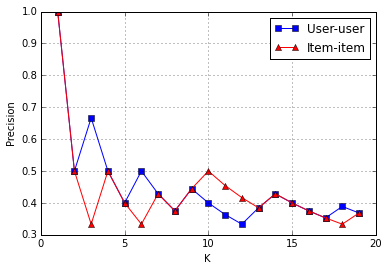

In [9]:
if __name__ == '__main__':
    # recommend()
    uu = map(int, '96 74 45 60  9 68 82  5 72 62 64 59 20 90 97 35 46 76 65 25'.split())
    ii = map(int, '96 74 60 45 82  9 68  5 72 20 62 59 64 90 97 35 25 65 76  2'.split())
    alex = loadAlex()
    plot(uu, ii, alex)